In [59]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pmdarima
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [16]:
# 한글 적용
import platform
platform.system()

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [17]:
# plt 차트 사이즈
plt.rcParams["figure.figsize"] = (13.5, 9)
plt.rcParams['axes.grid'] = True

In [18]:
daily_data = pd.read_excel(io = "final_corona_data.xlsx", sheet_name= "daily") #일일확진자
gender_data = pd.read_excel(io = "final_corona_data.xlsx", sheet_name= "gender") #성별
age_data = pd.read_excel(io = "final_corona_data.xlsx", sheet_name= "age")#나이

In [19]:
#일일확진자 현황
daily_data.head()

,기준일,사망자,확진자,일일확진자
0,2020-09-15,367,22391,106
1,2020-09-14,363,22285,109
2,2020-09-13,358,22176,121
3,2020-09-12,355,22055,136
4,2020-09-11,350,21919,176


In [20]:
daily_data.dtypes

기준일      datetime64[ns]
사망자               int64
확진자               int64
일일확진자             int64
dtype: object

In [21]:
gender_data.head()

,등록일,구분,사망률,사망자,확진률,확진자,일일확진자
0,2020-09-15,여성,47.68,175,54.33,12166,58
1,2020-09-15,남성,52.32,192,45.67,10225,48
2,2020-09-14,여성,47.66,173,54.33,12108,116
3,2020-09-14,남성,52.34,190,45.67,10177,114
4,2020-09-13,여성,47.61,169,54.37,11992,0


In [22]:
gender_data.dtypes

등록일      datetime64[ns]
구분               object
사망률             float64
사망자               int64
확진률             float64
확진자               int64
일일확진자             int64
dtype: object

In [23]:
age_data.head()

,등록일,구분,사망률,사망자,확진률,확진자,일일확진자
0,2020-09-15,0-9,0.00,0,2.40,538,6
1,2020-09-15,10-19,0.00,0,5.56,1244,8
2,2020-09-15,20-29,0.00,0,20.51,4592,8
3,2020-09-15,30-39,0.54,2,12.27,2748,10
4,2020-09-15,40-49,1.09,4,13.34,2986,18


In [24]:
age_data.dtypes

등록일      datetime64[ns]
구분               object
사망률             float64
사망자               int64
확진률             float64
확진자               int64
일일확진자             int64
dtype: object

In [25]:
daily_data = daily_data.set_index("기준일")
gender_data = gender_data.set_index("등록일")
age_data = age_data.set_index("등록일")

In [26]:
daily_data.sort_index(ascending = True).head()

,사망자,확진자,일일확진자
기준일,,,
2020-01-01,0,0,0
2020-02-02,2,2,2
2020-02-03,0,15,13
2020-02-04,0,0,-15
2020-02-05,0,19,1


In [27]:
gender_data.sort_index(ascending = True).head()

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-04-02,남성,50.62,82,39.90,3905,0
2020-04-02,여성,49.38,80,60.10,5881,0
2020-04-07,여성,47.40,91,59.95,6193,312
2020-04-07,남성,52.60,101,40.05,4138,233
2020-04-08,여성,47.00,94,59.91,6221,28


In [28]:
# 남성 코로나 확진자
male = gender_data.loc[(gender_data['구분']=='남성'), :]
male

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-09-15,남성,52.32,192,45.67,10225,48
2020-09-14,남성,52.34,190,45.67,10177,114
2020-09-13,남성,52.39,186,45.63,10063,0
2020-09-12,남성,52.39,186,45.63,10063,81
2020-09-11,남성,52.86,185,45.54,9982,77
...,...,...,...,...,...,...
2020-04-10,남성,52.40,109,40.19,4200,15
2020-04-09,남성,52.45,107,40.15,4185,22
2020-04-08,남성,53.00,106,40.09,4163,25


In [29]:
# 여성 코로나 확진자
female = gender_data.loc[(gender_data['구분']=='여성'), :]
female

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-09-15,여성,47.68,175,54.33,12166,58
2020-09-14,여성,47.66,173,54.33,12108,116
2020-09-13,여성,47.61,169,54.37,11992,0
2020-09-12,여성,47.61,169,54.37,11992,55
2020-09-11,여성,47.14,165,54.46,11937,99
...,...,...,...,...,...,...
2020-04-10,여성,47.60,99,59.81,6250,12
2020-04-09,여성,47.55,97,59.85,6238,17
2020-04-08,여성,47.00,94,59.91,6221,28


In [30]:
age_data.sort_index(ascending = True).head()

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-04-02,80 이상,50.62,82,4.52,442,0
2020-04-02,0-9,0.00,0,1.14,112,0
2020-04-02,10-19,0.00,0,5.26,515,0
2020-04-02,20-29,0.00,0,27.14,2656,0
2020-04-02,70-79,28.40,46,6.65,651,0


In [31]:
# 0 - 9
under_9 = age_data.loc[(age_data['구분']=='0-9'), :]
under_9

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-09-15,0-9,0.0,0,2.40,538,6
2020-09-14,0-9,0.0,0,2.39,532,6
2020-09-13,0-9,0.0,0,2.38,526,0
2020-09-12,0-9,0.0,0,2.38,526,4
2020-09-11,0-9,0.0,0,2.38,522,3
...,...,...,...,...,...,...
2020-04-10,0-9,0.0,0,1.23,129,1
2020-04-09,0-9,0.0,0,1.23,128,2
2020-04-08,0-9,0.0,0,1.21,126,0


In [32]:
# 10 - 19
between_10_19 = age_data.loc[(age_data['구분']=='10-19'), :]
between_10_19

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-09-15,10-19,0.0,0,5.56,1244,8
2020-09-14,10-19,0.0,0,5.55,1236,6
2020-09-13,10-19,0.0,0,5.58,1230,0
2020-09-12,10-19,0.0,0,5.58,1230,5
2020-09-11,10-19,0.0,0,5.59,1225,3
...,...,...,...,...,...,...
2020-04-10,10-19,0.0,0,5.29,553,1
2020-04-09,10-19,0.0,0,5.30,552,4
2020-04-08,10-19,0.0,0,5.28,548,4


In [33]:
# 20 - 29
between_20_29 = age_data.loc[(age_data['구분']=='20-29'), :]
between_20_29

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-09-15,20-29,0.0,0,20.51,4592,8
2020-09-14,20-29,0.0,0,20.57,4584,41
2020-09-13,20-29,0.0,0,20.60,4543,0
2020-09-12,20-29,0.0,0,20.60,4543,16
2020-09-11,20-29,0.0,0,20.65,4527,22
...,...,...,...,...,...,...
2020-04-10,20-29,0.0,0,27.28,2851,7
2020-04-09,20-29,0.0,0,27.29,2844,12
2020-04-08,20-29,0.0,0,27.27,2832,13


In [34]:
# 30 - 39
between_30_39 = age_data.loc[(age_data['구분']=='30-39'), :]
between_30_39

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-09-15,30-39,0.54,2,12.27,2748,10
2020-09-14,30-39,0.55,2,12.29,2738,25
2020-09-13,30-39,0.56,2,12.30,2713,0
2020-09-12,30-39,0.56,2,12.30,2713,12
2020-09-11,30-39,0.57,2,12.32,2701,19
...,...,...,...,...,...,...
2020-04-10,30-39,0.48,1,10.65,1113,4
2020-04-09,30-39,0.49,1,10.64,1109,7
2020-04-08,30-39,0.50,1,10.61,1102,10


In [35]:
# 40 - 49
between_40_49 = age_data.loc[(age_data['구분']=='40-49'), :]
between_40_49

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-09-15,40-49,1.09,4,13.34,2986,18
2020-09-14,40-49,1.10,4,13.32,2968,22
2020-09-13,40-49,1.13,4,13.36,2946,0
2020-09-12,40-49,1.13,4,13.36,2946,18
2020-09-11,40-49,1.14,4,13.36,2928,22
...,...,...,...,...,...,...
2020-04-10,40-49,1.44,3,13.36,1396,2
2020-04-09,40-49,1.47,3,13.37,1394,7
2020-04-08,40-49,1.50,3,13.36,1387,5


In [36]:
# 50 - 59
between_50_59 = age_data.loc[(age_data['구분']=='50-59'), :]
between_50_59

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-09-15,50-59,4.63,17,18.41,4122,18
2020-09-14,50-59,4.68,17,18.42,4104,43
2020-09-13,50-59,4.79,17,18.41,4061,0
2020-09-12,50-59,4.79,17,18.41,4061,34
2020-09-11,50-59,4.57,16,18.37,4027,34
...,...,...,...,...,...,...
2020-04-10,50-59,6.25,13,18.37,1920,3
2020-04-09,50-59,6.37,13,18.39,1917,2
2020-04-08,50-59,6.50,13,18.44,1915,6


In [37]:
# 60 - 69
between_60_69 = age_data.loc[(age_data['구분']=='60-69'), :]
between_60_69

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-09-15,60-69,11.44,42,15.66,3506,25
2020-09-14,60-69,11.57,42,15.62,3481,56
2020-09-13,60-69,11.83,42,15.53,3425,0
2020-09-12,60-69,11.83,42,15.53,3425,29
2020-09-11,60-69,12.00,42,15.49,3396,40
...,...,...,...,...,...,...
2020-04-10,60-69,13.46,28,12.63,1320,6
2020-04-09,60-69,13.24,27,12.61,1314,2
2020-04-08,60-69,13.50,27,12.63,1312,8


In [38]:
# 70 - 79
between_70_79 = age_data.loc[(age_data['구분']=='70-79'), :]
between_70_79

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-09-15,70-79,31.06,114,7.79,1745,11
2020-09-14,70-79,31.13,113,7.78,1734,24
2020-09-13,70-79,30.70,109,7.75,1710,0
2020-09-12,70-79,30.70,109,7.75,1710,14
2020-09-11,70-79,30.86,108,7.74,1696,16
...,...,...,...,...,...,...
2020-04-10,70-79,29.81,62,6.64,694,2
2020-04-09,70-79,29.41,60,6.64,692,0
2020-04-08,70-79,30.00,60,6.66,692,3


In [39]:
# 80대 이상
over_80 = age_data.loc[(age_data['구분']=='80 이상'), :]
over_80

,구분,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,,
2020-09-15,80 이상,51.23,188,4.06,910,2
2020-09-14,80 이상,50.96,185,4.07,908,7
2020-09-13,80 이상,50.99,181,4.09,901,0
2020-09-12,80 이상,50.99,181,4.09,901,4
2020-09-11,80 이상,50.86,178,4.09,897,17
...,...,...,...,...,...,...
2020-04-10,80 이상,48.56,101,4.54,474,1
2020-04-09,80 이상,49.02,100,4.54,473,3
2020-04-08,80 이상,48.00,96,4.53,470,4


# 일일확진자 데이터 시각화

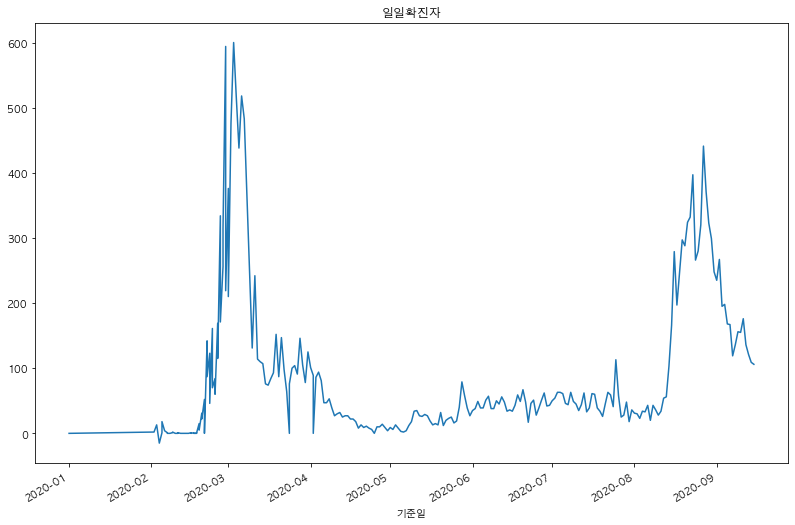

In [128]:
# 일일확진자
daily_data_day = daily_data['일일확진자'].plot(title = '일일확진자')
fig = daily_data_day.get_figure()
fig.set_size_inches(13.5, 9)

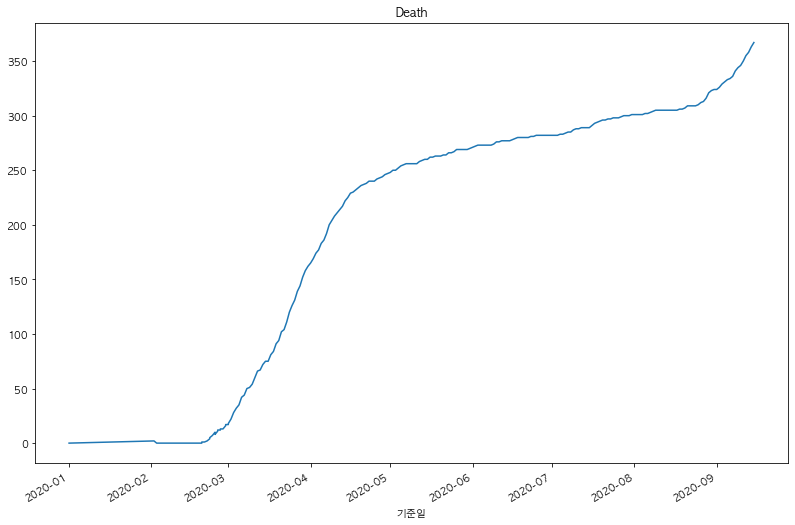

In [126]:
# 사망자
daily_data_day = daily_data['사망자'].plot(title = '사망자')
fig = daily_data_day.get_figure()
fig.set_size_inches(13.5, 9)

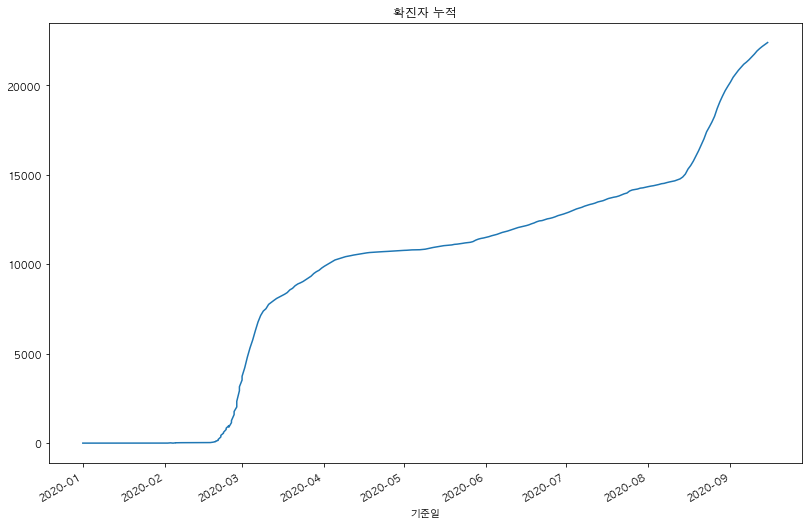

In [129]:
# 확진자
daily_data_day = daily_data['확진자'].plot(title = '확진자 누적')
fig = daily_data_day.get_figure()
fig.set_size_inches(13.5, 9)

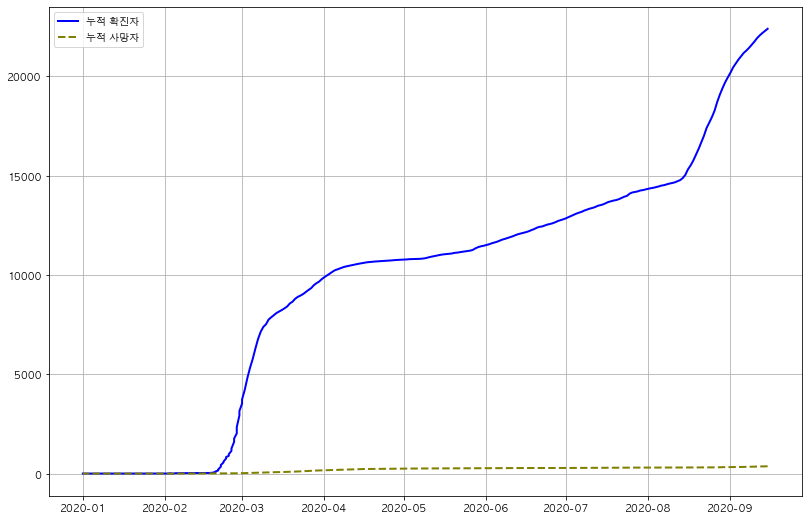

In [164]:
plt.plot(daily_data.index, '확진자', data = daily_data, marker = '', color = 'blue', linewidth=2, label = '누적 확진자')
plt.plot(daily_data.index, '사망자', data = daily_data, marker = '', color = 'olive', linewidth = 2, linestyle = 'dashed', label = '누적 사망자')
plt.legend()

# 성별 확진자 시각화

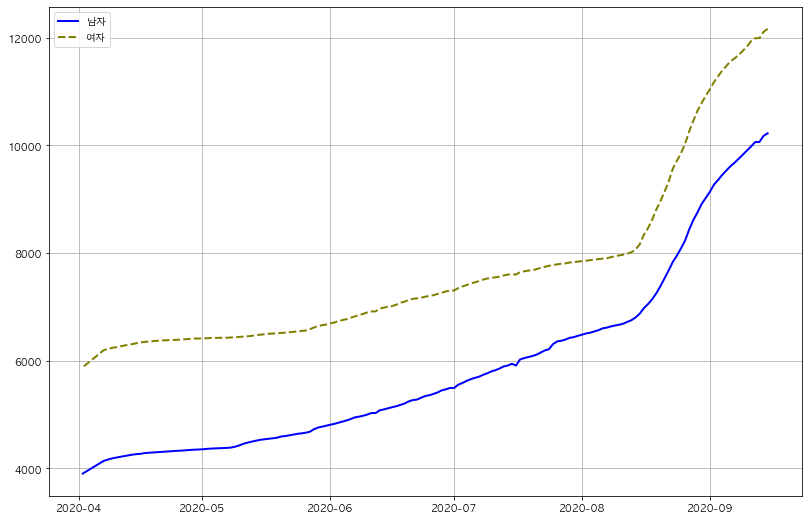

In [165]:
# 성별 누적 확진자
plt.plot(male.index, '확진자', data = male, marker = '', color = 'blue', linewidth=2, label = '남자')
plt.plot(female.index, '확진자', data = female, marker = '', color = 'olive', linewidth = 2, linestyle = 'dashed', label = '여자')
plt.legend()

# 나이대별 확진자 시각화

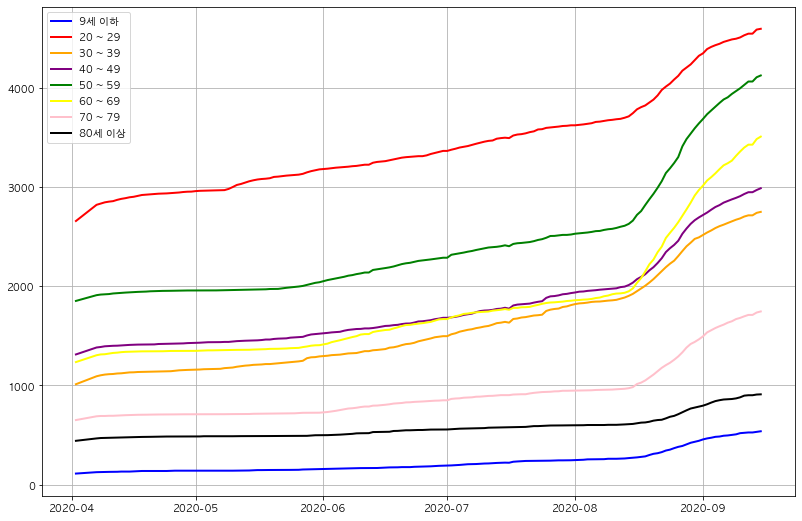

In [166]:
# 나이대별 누적 확진자
plt.plot(under_9.index, '확진자', data = under_9, marker = '', color = 'blue', linewidth=2, label = '9세 이하')
plt.plot(between_20_29.index, '확진자', data = between_20_29, marker = '', color = 'red', linewidth = 2, label = '20 ~ 29')
plt.plot(between_30_39.index, '확진자', data = between_30_39, marker = '', color = 'orange', linewidth = 2, label = '30 ~ 39')
plt.plot(between_40_49.index, '확진자', data = between_40_49, marker = '', color = 'purple', linewidth = 2, label = '40 ~ 49')
plt.plot(between_50_59.index, '확진자', data = between_50_59, marker = '', color = 'green', linewidth = 2, label = '50 ~ 59')
plt.plot(between_60_69.index, '확진자', data = between_60_69, marker = '', color = 'yellow', linewidth = 2, label = '60 ~ 69')
plt.plot(between_70_79.index, '확진자', data = between_70_79, marker = '', color = 'pink', linewidth = 2, label = '70 ~ 79')
plt.plot(over_80.index, '확진자', data = over_80, marker = '', color = 'black', linewidth = 2, label = '80세 이상')
plt.legend()

# 코로나 데이터 월별 평균

In [41]:
month_daily = daily_data.resample('M').mean()
month_daily

,사망자,확진자,일일확진자
기준일,,,
2020-01-31,0.000000,0.000000,0.000000
2020-02-29,2.771930,408.771930,55.263158
2020-03-31,82.636364,7740.787879,201.090909
2020-04-30,215.935484,10494.677419,31.258065
2020-05-31,260.677419,11039.677419,22.677419
2020-06-30,277.533333,12148.600000,44.400000
2020-07-31,291.548387,13610.806452,48.548387
2020-08-31,307.548387,16116.225806,182.000000
2020-09-30,342.466667,21412.600000,162.933333


In [42]:
month_age = age_data.resample('M').mean()
month_age

,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,
2020-04-30,11.110889,25.035556,11.111022,1175.746667,4.351111
2020-05-31,11.111333,28.951852,11.111185,1226.251852,2.603704
2020-06-30,11.111230,30.861111,11.111468,1352.293651,5.285714
2020-07-31,11.111219,32.394265,11.111290,1511.774194,5.394265
2020-08-31,11.111434,33.810036,11.110932,1790.691756,20.222222
2020-09-30,11.110963,38.029630,11.111185,2378.281481,18.103704


In [43]:
month_gender = gender_data.resample("M").mean()
month_gender

,사망률,사망자,확진률,확진자,일일확진자
등록일,,,,,
2020-04-30,50.000000,112.660000,50.0,5290.860000,19.580000
2020-05-31,50.000000,130.283333,50.0,5518.133333,11.716667
2020-06-30,50.000000,139.232143,50.0,6085.321429,23.785714
2020-07-31,50.000323,145.774194,50.0,6802.983871,24.274194
2020-08-31,50.000000,152.145161,50.0,8058.112903,91.000000
2020-09-30,50.000000,171.133333,50.0,10702.266667,81.466667


# 경제 지표

In [44]:
month_2 = pd.read_excel(io = 'month.xlsx',
                       sheet_name = 'Sheet1',
                       header = 'infer')

In [45]:
month = month_2.drop([0, 1, 2, 3, 4])
month.tail(5)

,월,백화점,대형마트,면세점,슈퍼마켓 및 잡화점,편의점,승용차 및 연료 소매점,전문소매점,무점포 소매,전국총지수,...,15세 이상 전체.3,15 - 19세.3,20 - 29세.3,30 - 39세.3,40 - 49세.3,50 - 59세.3,60세이상.3,15 - 64세.3,15 - 24세.3,15 - 29세.3
8,2020. 04,2054418.0,2593974.0,986741.0,3774884.0,2037033.0,8728432.0,9802949.0,7721554.0,104.95,...,59.4,5.2,54.6,74.9,76.5,73.6,41.8,65.1,23.3,40.9
9,2020. 05,2470565.0,2709738.0,1017936.0,4141603.0,2292813.0,8779373.0,11412335.0,8143559.0,104.71,...,60.2,6.8,55.7,75.0,76.8,74.2,43.1,65.8,25.4,42.2
10,2020. 06,2309589.0,2598351.0,1113009.0,3886283.0,2315814.0,9785645.0,10479754.0,7946581.0,104.87,...,60.4,7.0,55.4,75.4,76.9,74.5,43.8,65.9,25.6,42.0
11,2020. 07,2142902.0,2689437.0,1251560.0,3777664.0,2385425.0,8773939.0,9710722.0,7985710.0,104.86,...,60.5,7.3,56.1,75.4,76.9,74.3,43.8,66.0,26.3,42.7
12,2020. 08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
period = pd.date_range("2020-01", "2020-09", freq = 'M')
period

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', freq='M')

In [47]:
del month['월']
month.head()

,백화점,대형마트,면세점,슈퍼마켓 및 잡화점,편의점,승용차 및 연료 소매점,전문소매점,무점포 소매,전국총지수,전국생활물가지수,...,15세 이상 전체.3,15 - 19세.3,20 - 29세.3,30 - 39세.3,40 - 49세.3,50 - 59세.3,60세이상.3,15 - 64세.3,15 - 24세.3,15 - 29세.3
5,2544698.0,3235490.0,2024766.0,4008521.0,2060450.0,7770740.0,11020869.0,6918089.0,105.79,106.26,...,60.0,8.1,58.1,76.7,78.1,74.5,38.6,66.7,26.9,44.0
6,1801392.0,2465227.0,1102558.0,3569992.0,1937346.0,6921739.0,9409341.0,7284857.0,105.80,106.39,...,60.0,7.7,56.6,76.5,77.8,74.3,40.1,66.3,26.0,42.9
7,1696082.0,2599681.0,1087340.0,3845251.0,2015881.0,8968590.0,8958971.0,8198506.0,105.54,106.31,...,59.5,6.0,54.5,75.4,77.3,73.7,41.2,65.4,23.5,41.0
8,2054418.0,2593974.0,986741.0,3774884.0,2037033.0,8728432.0,9802949.0,7721554.0,104.95,105.11,...,59.4,5.2,54.6,74.9,76.5,73.6,41.8,65.1,23.3,40.9
9,2470565.0,2709738.0,1017936.0,4141603.0,2292813.0,8779373.0,11412335.0,8143559.0,104.71,104.55,...,60.2,6.8,55.7,75.0,76.8,74.2,43.1,65.8,25.4,42.2


In [48]:
month['monthly_index'] = period
month.head()

,백화점,대형마트,면세점,슈퍼마켓 및 잡화점,편의점,승용차 및 연료 소매점,전문소매점,무점포 소매,전국총지수,전국생활물가지수,...,15 - 19세.3,20 - 29세.3,30 - 39세.3,40 - 49세.3,50 - 59세.3,60세이상.3,15 - 64세.3,15 - 24세.3,15 - 29세.3,monthly_index
5,2544698.0,3235490.0,2024766.0,4008521.0,2060450.0,7770740.0,11020869.0,6918089.0,105.79,106.26,...,8.1,58.1,76.7,78.1,74.5,38.6,66.7,26.9,44.0,2020-01-31
6,1801392.0,2465227.0,1102558.0,3569992.0,1937346.0,6921739.0,9409341.0,7284857.0,105.80,106.39,...,7.7,56.6,76.5,77.8,74.3,40.1,66.3,26.0,42.9,2020-02-29
7,1696082.0,2599681.0,1087340.0,3845251.0,2015881.0,8968590.0,8958971.0,8198506.0,105.54,106.31,...,6.0,54.5,75.4,77.3,73.7,41.2,65.4,23.5,41.0,2020-03-31
8,2054418.0,2593974.0,986741.0,3774884.0,2037033.0,8728432.0,9802949.0,7721554.0,104.95,105.11,...,5.2,54.6,74.9,76.5,73.6,41.8,65.1,23.3,40.9,2020-04-30
9,2470565.0,2709738.0,1017936.0,4141603.0,2292813.0,8779373.0,11412335.0,8143559.0,104.71,104.55,...,6.8,55.7,75.0,76.8,74.2,43.1,65.8,25.4,42.2,2020-05-31


In [49]:
month_1 = month.set_index('monthly_index')
month_1.head()

,백화점,대형마트,면세점,슈퍼마켓 및 잡화점,편의점,승용차 및 연료 소매점,전문소매점,무점포 소매,전국총지수,전국생활물가지수,...,15세 이상 전체.3,15 - 19세.3,20 - 29세.3,30 - 39세.3,40 - 49세.3,50 - 59세.3,60세이상.3,15 - 64세.3,15 - 24세.3,15 - 29세.3
monthly_index,,,,,,,,,,,,,,,,,,,,,
2020-01-31,2544698.0,3235490.0,2024766.0,4008521.0,2060450.0,7770740.0,11020869.0,6918089.0,105.79,106.26,...,60.0,8.1,58.1,76.7,78.1,74.5,38.6,66.7,26.9,44.0
2020-02-29,1801392.0,2465227.0,1102558.0,3569992.0,1937346.0,6921739.0,9409341.0,7284857.0,105.80,106.39,...,60.0,7.7,56.6,76.5,77.8,74.3,40.1,66.3,26.0,42.9
2020-03-31,1696082.0,2599681.0,1087340.0,3845251.0,2015881.0,8968590.0,8958971.0,8198506.0,105.54,106.31,...,59.5,6.0,54.5,75.4,77.3,73.7,41.2,65.4,23.5,41.0
2020-04-30,2054418.0,2593974.0,986741.0,3774884.0,2037033.0,8728432.0,9802949.0,7721554.0,104.95,105.11,...,59.4,5.2,54.6,74.9,76.5,73.6,41.8,65.1,23.3,40.9
2020-05-31,2470565.0,2709738.0,1017936.0,4141603.0,2292813.0,8779373.0,11412335.0,8143559.0,104.71,104.55,...,60.2,6.8,55.7,75.0,76.8,74.2,43.1,65.8,25.4,42.2


In [186]:
# 소매업태별 판매액
A = month_1.iloc[:, 0:8]
A

,백화점,대형마트,면세점,슈퍼마켓 및 잡화점,편의점,승용차 및 연료 소매점,전문소매점,무점포 소매
monthly_index,,,,,,,,
2020-01-31,2544698.0,3235490.0,2024766.0,4008521.0,2060450.0,7770740.0,11020869.0,6918089.0
2020-02-29,1801392.0,2465227.0,1102558.0,3569992.0,1937346.0,6921739.0,9409341.0,7284857.0
2020-03-31,1696082.0,2599681.0,1087340.0,3845251.0,2015881.0,8968590.0,8958971.0,8198506.0
2020-04-30,2054418.0,2593974.0,986741.0,3774884.0,2037033.0,8728432.0,9802949.0,7721554.0
2020-05-31,2470565.0,2709738.0,1017936.0,4141603.0,2292813.0,8779373.0,11412335.0,8143559.0
2020-06-30,2309589.0,2598351.0,1113009.0,3886283.0,2315814.0,9785645.0,10479754.0,7946581.0
2020-07-31,2142902.0,2689437.0,1251560.0,3777664.0,2385425.0,8773939.0,9710722.0,7985710.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
# 생활물가지수
B = month_1.iloc[:, 8:15]
B

,전국총지수,전국생활물가지수,전국식품,전국식품 이외,전국전월세,전국생활물가 이외,전국전·월세포함 생활물가지수
monthly_index,,,,,,,
2020-01-31,105.79,106.26,110.72,103.89,104.03,105.50,105.93
2020-02-29,105.80,106.39,110.60,104.16,104.06,105.34,106.04
2020-03-31,105.54,106.31,111.39,103.59,104.08,104.77,105.97
2020-04-30,104.95,105.11,111.00,101.97,104.11,104.89,104.96
2020-05-31,104.71,104.55,111.34,100.94,104.14,105.05,104.49
2020-06-30,104.87,104.88,111.33,101.45,104.17,104.98,104.77
2020-07-31,104.86,104.39,111.43,100.64,104.23,105.63,104.36
2020-08-31,105.50,105.21,113.50,100.80,104.30,106.16,105.07


In [188]:
# 월간 카드승인실적
C = month_1.iloc[:, 15:23]
C

,도매 및 소매업,운수업,숙박 및 음식점업,사업시설관리 및 사업지원 서비스업,교육서비스업,보건업 및 사회복지 서비스업,"예술, 스포츠 및 여가관련 서비스업","협회 및 단체, 수리 및 기타 개인 서비스업"
monthly_index,,,,,,,,
2020-01-31,3401.0,146.0,1042.0,40.0,129.0,444.0,91.0,162.0
2020-02-29,3119.0,75.0,869.0,22.0,109.0,399.0,79.0,144.0
2020-03-31,3475.0,43.0,802.0,18.0,72.0,359.0,84.0,140.0
2020-04-30,3477.0,45.0,908.0,19.0,90.0,379.0,102.0,151.0
2020-05-31,3917.0,55.0,1107.0,29.0,119.0,418.0,126.0,182.0
2020-06-30,3809.0,57.0,1033.0,22.0,119.0,430.0,120.0,171.0
2020-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
# 소비자물가 등락률(전월비)
D = month_1.iloc[:, 23:28]
D

,총지수,생활물가지수,신선식품지수,농산물및석유류제외지수,식료품및에너지제외지수
monthly_index,,,,,
2020-01-31,0.6,0.7,6.3,0.4,0.4
2020-02-29,0.0,0.1,-1.4,0.1,0.1
2020-03-31,-0.2,-0.1,-0.1,-0.1,-0.2
2020-04-30,-0.6,-1.1,-0.1,-0.2,-0.2
2020-05-31,-0.2,-0.5,-2.5,0.2,0.1
2020-06-30,0.2,0.3,-2.7,0.1,0.0
2020-07-31,0.0,-0.5,1.3,-0.1,0.3
2020-08-31,0.6,0.8,10.5,0.2,0.2


In [190]:
# 상품군별판매액지수(경상지수)
E = month_1.iloc[:, 28:54]
E

,총지수.1,총지수(승용차 제외),내구재,승용차,국내 승용차,수입 승용차,가전제품,통신기기 및 컴퓨터,통신기기,컴퓨터,...,가방,"오락, 취미, 경기용품",기타준내구재,비내구재,음식료품,의약품,화장품,"서적, 문구",차량연료,기타비내구재
monthly_index,,,,,,,,,,,,,,,,,,,,,
2020-01-31,116.3,119.2,105.7,92.0,91.4,93.1,128.7,94.7,88.3,107.1,...,132.9,99.1,118.0,128.6,136.2,122.2,166.7,114.3,110.2,107.7
2020-02-29,101.4,104.2,101.4,78.0,72.4,88.7,140.1,98.1,90.3,113.2,...,87.1,100.4,105.2,111.0,114.3,123.2,116.4,107.3,101.2,103.0
2020-03-31,109.8,106.8,127.9,135.4,149.7,108.0,146.3,102.0,89.7,125.8,...,76.6,116.8,108.2,113.9,119.2,124.2,118.4,116.9,100.6,105.1
2020-04-30,110.8,107.0,130.0,142.6,152.5,123.5,148.4,93.5,82.4,114.9,...,81.4,138.7,107.6,109.5,117.7,124.4,118.8,100.6,88.1,100.0
2020-05-31,120.4,117.5,138.3,144.9,154.6,126.2,178.3,93.4,89.6,100.7,...,101.2,163.5,120.4,114.3,124.2,127.9,122.9,101.3,87.8,109.6
2020-06-30,118.8,112.9,148.4,168.6,183.2,140.5,185.5,86.9,84.7,91.4,...,99.2,145.1,121.1,111.9,117.9,127.4,123.1,98.7,90.9,109.3
2020-07-31,113.8,111.2,130.4,135.2,148.0,110.4,162.5,89.8,85.4,98.4,...,99.3,145.2,122.3,114.3,120.6,122.0,126.1,97.2,96.9,109.9
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
# 상품군별판매액지수(불변지수)
F = month_1.iloc[:, 54:80]
F

,총지수.2,총지수(승용차 제외).1,내구재.1,승용차.1,국내 승용차.1,수입 승용차.1,가전제품.1,통신기기 및 컴퓨터.1,통신기기.1,컴퓨터.1,...,가방.1,"오락, 취미, 경기용품.1",기타준내구재.1,비내구재.1,음식료품.1,의약품.1,화장품.1,"서적, 문구.1",차량연료.1,기타비내구재.1
monthly_index,,,,,,,,,,,,,,,,,,,,,
2020-01-31,111.8,114.2,105.5,91.5,90.2,94.0,138.0,94.6,88.6,106.0,...,121.6,95.9,113.1,121.9,123.5,118.7,174.7,108.6,104.2,107.2
2020-02-29,97.4,99.9,100.9,76.6,71.8,85.9,149.9,98.6,90.6,114.0,...,79.7,96.1,99.1,105.4,104.1,119.6,121.2,101.9,96.6,102.5
2020-03-31,106.7,103.0,129.4,137.7,153.3,107.7,158.3,102.9,90.1,127.8,...,69.7,112.2,102.9,108.9,107.7,120.4,123.5,111.1,101.4,105.3
2020-04-30,108.9,104.6,131.0,145.0,156.4,123.2,160.6,92.0,79.7,115.8,...,77.6,133.3,102.5,107.0,106.3,120.5,124.9,96.9,99.2,100.7
2020-05-31,118.6,115.2,139.4,147.1,158.3,125.3,192.2,91.9,86.7,101.9,...,93.2,156.0,113.3,112.8,112.1,123.9,129.1,97.5,105.5,110.4
2020-06-30,116.9,110.4,150.1,171.3,187.8,139.6,200.9,84.6,80.6,92.5,...,92.2,138.4,115.1,109.7,106.6,123.4,127.5,95.0,103.6,110.2
2020-07-31,111.1,108.3,130.1,134.0,147.6,107.7,176.9,87.2,81.3,98.7,...,91.5,138.9,115.3,111.4,109.0,118.1,129.9,93.7,107.4,110.9
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
# 상품군별 판매액(경상금액)
G = month_1.iloc[:, 80:98]
G

,내구재.2,승용차.2,가전제품.2,통신기기 및 컴퓨터.2,가구.2,기타내구재.2,준내구재.2,의복.2,신발 및 가방.2,"오락, 취미, 경기용품.2",기타준내구재.2,비내구재.2,음식료품.2,의약품.2,화장품.2,"서적, 문구.2",차량연료.2,기타비내구재.2
monthly_index,,,,,,,,,,,,,,,,,,
2020-01-31,8793306.0,3344908.0,1924601.0,1568381.0,712781.0,1242635.0,7845676.0,4362012.0,1247937.0,777182.0,1458545.0,22944642.0,10922887.0,1899418.0,3069265.0,614520.0,4174108.0,2264443.0
2020-02-29,8440138.0,2836668.0,2095514.0,1624054.0,782243.0,1101658.0,6252856.0,3254204.0,909458.0,788045.0,1301150.0,19799458.0,9165879.0,1915016.0,2142058.0,577042.0,3834844.0,2164618.0
2020-03-31,10641468.0,4925233.0,2188035.0,1689552.0,819816.0,1018832.0,6409248.0,3266503.0,888623.0,916502.0,1337620.0,20319585.0,9560005.0,1930325.0,2178804.0,628217.0,3812558.0,2209677.0
2020-04-30,10818627.0,5185278.0,2219147.0,1548262.0,855684.0,1010256.0,7343489.0,3949202.0,975933.0,1088124.0,1330230.0,19537869.0,9437188.0,1933149.0,2186310.0,540550.0,3337512.0,2103160.0
2020-05-31,11508905.0,5268404.0,2666832.0,1546022.0,875174.0,1152473.0,9069192.0,5011460.0,1286638.0,1282470.0,1488624.0,20389825.0,9965521.0,1987584.0,2263063.0,544441.0,3326169.0,2303048.0
2020-06-30,12350653.0,6132747.0,2773324.0,1439613.0,821718.0,1183251.0,8108948.0,4382773.0,1090182.0,1138269.0,1497724.0,19975424.0,9457243.0,1981107.0,2265208.0,530708.0,3443190.0,2297969.0
2020-07-31,10854663.0,4915167.0,2429567.0,1487610.0,822482.0,1199836.0,7462627.0,3809320.0,1001470.0,1139510.0,1512326.0,20400068.0,9677469.0,1896714.0,2321850.0,522341.0,3671101.0,2310594.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# 지출목적별 소비자물가지수
H = month_1.iloc[:, 98:111]
H

,0 총지수,01 식료품 · 비주류음료,02 주류 및 담배,03 의류 및 신발,04 주택 ·수도 · 전기 및 연료,05 가정용품 및 가사 서비스,06 보건,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스
monthly_index,,,,,,,,,,,,,
2020-01-31,105.79,110.81,103.51,104.43,103.43,107.26,103.83,105.03,96.14,101.82,104.08,110.97,110.02
2020-02-29,105.80,110.27,103.56,104.78,104.09,107.85,103.68,104.82,96.09,100.56,104.26,110.93,110.49
2020-03-31,105.54,111.26,103.37,104.73,104.11,107.23,103.74,101.99,96.05,100.34,104.26,110.82,110.43
2020-04-30,104.95,111.29,103.35,103.92,103.95,107.14,103.83,98.47,96.68,100.22,102.69,110.90,110.11
2020-05-31,104.71,111.48,103.44,104.79,103.57,107.58,103.81,96.00,96.62,100.65,102.44,110.86,110.51
2020-06-30,104.87,111.18,103.44,104.79,103.67,106.98,103.97,97.54,96.87,100.37,102.36,110.95,110.81
2020-07-31,104.86,111.28,103.45,105.20,101.18,107.13,103.88,99.60,96.78,101.77,102.44,111.13,111.09
2020-08-31,105.50,114.78,103.44,105.10,101.53,107.41,103.86,99.84,96.71,102.78,102.48,111.35,110.98


In [194]:
# 품목성질별_소비자물가지수
I = month_1.iloc[:, 111:120]
I

,총지수.3,상품,농축수산물,공업제품,전기 · 수도 · 가스,서비스,집세,공공서비스,개인서비스
monthly_index,,,,,,,,,
2020-01-31,105.79,103.88,115.23,103.12,89.98,107.33,104.03,102.18,110.72
2020-02-29,105.80,103.81,114.01,103.29,89.99,107.40,104.06,102.07,110.89
2020-03-31,105.54,103.33,114.92,102.46,90.00,107.34,104.08,101.90,110.84
2020-04-30,104.95,102.30,115.01,101.07,89.85,107.12,104.11,100.83,110.94
2020-05-31,104.71,101.91,115.02,100.55,89.80,107.02,104.14,100.58,110.87
2020-06-30,104.87,102.23,114.37,101.13,89.74,107.04,104.17,100.47,110.95
2020-07-31,104.86,101.82,114.75,101.81,79.63,107.35,104.23,100.56,111.43
2020-08-31,105.50,102.83,121.20,101.76,79.83,107.67,104.30,100.75,111.91


In [195]:
# 취업자 (천명)
J = month_1.iloc[:, 120:137]
J

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
monthly_index,,,,,,,,,,,,,,,,,
2020-01-31,5089.0,1660.0,1190.0,1552.0,750.0,776.0,568.0,172.0,6956.0,735.0,858.0,1114.0,907.0,956.0,1393.0,1736.0,389.0
2020-02-29,5103.0,1651.0,1193.0,1566.0,750.0,784.0,569.0,171.0,6909.0,759.0,868.0,1120.0,904.0,968.0,1407.0,1735.0,380.0
2020-03-31,5017.0,1643.0,1124.0,1541.0,739.0,767.0,556.0,173.0,6874.0,798.0,884.0,1147.0,907.0,960.0,1392.0,1718.0,370.0
2020-04-30,4986.0,1601.0,1131.0,1546.0,737.0,768.0,552.0,177.0,6852.0,801.0,887.0,1173.0,913.0,960.0,1395.0,1713.0,370.0
2020-05-31,5033.0,1611.0,1170.0,1571.0,747.0,774.0,557.0,178.0,6944.0,818.0,908.0,1190.0,931.0,981.0,1421.0,1724.0,373.0
2020-06-30,5049.0,1634.0,1188.0,1566.0,755.0,779.0,557.0,183.0,6937.0,821.0,911.0,1205.0,944.0,991.0,1424.0,1743.0,369.0
2020-07-31,5076.0,1639.0,1193.0,1571.0,749.0,780.0,562.0,184.0,6923.0,816.0,909.0,1209.0,946.0,983.0,1445.0,1744.0,376.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# 실업자 (천명)
K = month_1.iloc[:, 137:154]
K

,서울특별시.1,부산광역시.1,대구광역시.1,인천광역시.1,광주광역시.1,대전광역시.1,울산광역시.1,세종특별자치시.1,경기도.1,강원도.1,충청북도.1,충청남도.1,전라북도.1,전라남도.1,경상북도.1,경상남도.1,제주도.1
monthly_index,,,,,,,,,,,,,,,,,
2020-01-31,224.0,66.0,45.0,72.0,30.0,42.0,31.0,5.0,293.0,55.0,38.0,40.0,25.0,37.0,76.0,64.0,11.0
2020-02-29,227.0,74.0,49.0,68.0,27.0,41.0,32.0,6.0,314.0,37.0,33.0,49.0,27.0,30.0,56.0,70.0,10.0
2020-03-31,265.0,73.0,49.0,83.0,30.0,41.0,26.0,5.0,300.0,31.0,29.0,47.0,25.0,25.0,53.0,85.0,11.0
2020-04-30,281.0,84.0,49.0,80.0,32.0,41.0,24.0,6.0,286.0,33.0,27.0,43.0,25.0,25.0,60.0,69.0,10.0
2020-05-31,308.0,91.0,55.0,78.0,35.0,45.0,25.0,7.0,298.0,31.0,30.0,54.0,31.0,29.0,77.0,74.0,12.0
2020-06-30,254.0,84.0,56.0,83.0,33.0,40.0,31.0,6.0,293.0,33.0,31.0,52.0,26.0,22.0,80.0,87.0,15.0
2020-07-31,237.0,83.0,54.0,69.0,29.0,41.0,25.0,6.0,302.0,33.0,27.0,44.0,21.0,26.0,64.0,69.0,9.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
# 실업률(%)
L = month_1.iloc[:, 154:171]
L

,서울특별시.2,부산광역시.2,대구광역시.2,인천광역시.2,광주광역시.2,대전광역시.2,울산광역시.2,세종특별자치시.2,경기도.2,강원도.2,충청북도.2,충청남도.2,전라북도.2,전라남도.2,경상북도.2,경상남도.2,제주도.2
monthly_index,,,,,,,,,,,,,,,,,
2020-01-31,4.2,3.8,3.6,4.5,3.8,5.1,5.2,2.7,4.0,6.9,4.2,3.5,2.7,3.7,5.2,3.6,2.7
2020-02-29,4.3,4.3,4.0,4.2,3.4,5.0,5.3,3.4,4.3,4.7,3.7,4.2,2.9,3.0,3.8,3.9,2.7
2020-03-31,5.0,4.3,4.2,5.1,3.8,5.1,4.4,3.0,4.2,3.7,3.2,3.9,2.7,2.6,3.7,4.7,2.8
2020-04-30,5.3,5.0,4.1,4.9,4.2,5.1,4.2,3.1,4.0,3.9,2.9,3.5,2.6,2.5,4.1,3.9,2.6
2020-05-31,5.8,5.3,4.5,4.7,4.4,5.5,4.2,3.6,4.1,3.7,3.2,4.3,3.3,2.9,5.1,4.1,3.1
2020-06-30,4.8,4.9,4.5,5.0,4.2,4.8,5.3,3.4,4.1,3.9,3.3,4.2,2.7,2.2,5.3,4.7,4.0
2020-07-31,4.5,4.8,4.3,4.2,3.7,5.0,4.2,3.4,4.2,3.9,2.8,3.5,2.1,2.6,4.2,3.8,2.3
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# 실업률(%)
M = month_1.iloc[:, 171:188]
M

,서울특별시.3,부산광역시.3,대구광역시.3,인천광역시.3,광주광역시.3,대전광역시.3,울산광역시.3,세종특별자치시.3,경기도.3,강원도.3,충청북도.3,충청남도.3,전라북도.3,전라남도.3,경상북도.3,경상남도.3,제주도.3
monthly_index,,,,,,,,,,,,,,,,,
2020-01-31,60.0,56.2,56.7,61.1,59.1,60.2,58.8,61.4,61.2,56.3,61.0,59.1,58.2,62.4,60.0,60.8,69.2
2020-02-29,60.1,55.9,56.8,61.6,59.1,60.8,59.0,60.9,60.7,58.1,61.7,59.4,58.0,63.3,60.6,60.7,67.6
2020-03-31,59.0,55.7,53.6,60.6,58.2,59.5,57.6,61.4,60.3,61.1,62.8,60.9,58.2,62.8,60.0,60.2,65.8
2020-04-30,58.6,54.3,54.0,60.8,57.9,59.7,57.2,62.5,60.0,61.3,63.1,62.3,58.7,62.9,60.1,60.0,65.8
2020-05-31,59.1,54.6,55.9,61.8,58.7,60.1,57.8,62.7,60.8,62.6,64.5,63.2,59.8,64.3,61.2,60.4,66.4
2020-06-30,59.2,55.4,56.9,61.6,59.2,60.5,57.7,64.2,60.6,62.8,64.7,64.0,60.7,65.0,61.3,61.1,65.6
2020-07-31,59.5,55.6,57.1,61.8,58.7,60.6,58.3,64.1,60.4,62.3,64.5,64.2,60.9,64.5,62.3,61.1,66.8
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
# 소매업태별 판매액지수(경상)
N = month_1.iloc[:, 188:208]
N

,총지수.4,백화점.1,대형마트.1,면세점.1,슈퍼마켓 및 잡화점.1,체인 슈퍼마켓,일반 슈퍼마켓 및 잡화점,편의점.1,승용차 및 연료 소매점.1,승용차 소매점,연료 소매점,전문소매점.1,가전·컴퓨터·통신기기 소매점,의복·신발·가방 소매점,음식·가정· 문화상품 소매점,의약품·화장품·기타상품 소매점,무점포 소매.1,인터넷 쇼핑,홈쇼핑,방문 및 배달 소매점
monthly_index,,,,,,,,,,,,,,,,,,,,
2020-01-31,116.3,105.2,118.5,264.1,110.6,129.8,100.6,150.3,102.1,92.0,111.4,95.0,83.8,87.6,98.9,106.9,177.4,223.5,136.2,87.2
2020-02-29,101.4,74.5,90.3,143.8,98.5,114.5,90.2,141.3,91.0,78.0,102.8,81.1,83.9,62.8,85.7,94.8,186.8,244.7,134.4,74.2
2020-03-31,109.8,70.1,95.2,141.9,106.1,126.0,95.7,147.0,117.9,135.4,101.8,77.2,84.4,59.3,79.3,90.2,210.3,277.0,151.2,78.6
2020-04-30,110.8,84.9,95.0,128.7,104.2,120.1,95.8,148.5,114.7,142.6,89.2,84.5,85.1,75.8,84.1,94.2,198.0,260.9,137.8,80.1
2020-05-31,120.4,102.1,99.2,132.8,114.3,130.9,105.6,167.2,115.4,144.9,88.4,98.3,95.7,102.0,94.1,100.7,208.9,277.1,144.7,79.2
2020-06-30,118.8,95.5,95.1,145.2,107.3,122.1,99.5,168.9,128.6,168.6,92.0,90.3,96.7,81.3,86.4,100.2,203.8,269.8,143.0,76.7
2020-07-31,113.8,88.6,98.5,163.3,104.3,120.8,95.6,174.0,115.3,135.2,97.1,83.7,88.1,70.8,83.8,95.2,204.8,274.3,135.3,78.4
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# 소매업태별 판매액지수(불변)
O = month_1.iloc[:, 208:228]
O

,총지수.5,백화점.2,대형마트.2,면세점.2,슈퍼마켓 및 잡화점.2,체인 슈퍼마켓.1,일반 슈퍼마켓 및 잡화점.1,편의점.2,승용차 및 연료 소매점.2,승용차 소매점.1,연료 소매점.1,전문소매점.2,가전·컴퓨터·통신기기 소매점.1,의복·신발·가방 소매점.1,음식·가정· 문화상품 소매점.1,의약품·화장품·기타상품 소매점.1,무점포 소매.2,인터넷 쇼핑.1,홈쇼핑.1,방문 및 배달 소매점.1
monthly_index,,,,,,,,,,,,,,,,,,,,
2020-01-31,111.8,101.0,110.7,267.7,102.0,118.6,93.3,142.8,98.8,91.5,105.4,91.7,86.5,83.7,90.5,106.0,171.9,216.5,131.7,84.9
2020-02-29,97.4,71.7,84.5,146.6,91.2,105.2,83.9,134.9,87.8,76.6,98.1,78.3,86.6,59.8,78.3,93.4,181.2,237.5,130.0,71.9
2020-03-31,106.7,67.7,88.7,146.0,97.6,115.0,88.4,140.2,119.2,137.7,102.2,74.6,87.7,56.4,72.4,88.7,203.9,268.9,146.1,76.1
2020-04-30,108.9,82.3,88.6,133.6,95.8,109.5,88.6,141.7,121.4,145.0,99.7,81.7,87.4,73.0,76.9,92.8,192.1,253.3,133.3,77.7
2020-05-31,118.6,98.5,92.8,137.0,104.9,119.2,97.5,158.8,125.4,147.1,105.5,94.7,98.5,97.0,85.8,99.2,202.3,268.6,139.8,76.3
2020-06-30,116.9,92.1,89.1,148.3,98.7,111.5,92.1,160.6,136.3,171.3,104.3,87.2,99.7,77.5,79.1,98.6,197.7,261.7,139.2,73.8
2020-07-31,111.1,85.2,91.9,165.7,95.9,110.2,88.4,165.6,120.0,134.0,107.3,80.6,90.4,67.1,76.5,93.5,197.9,265.4,130.6,75.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
# 서비스업생산지수(경상)
P = month_1.iloc[:, 228:470]
P

,총지수.6,도매 및 소매업.1,자동차 및 부품 판매업,자동차 판매업,자동차 부품 및 이륜차 판매업,도매업,산업용 농축산물 도매업,음ㆍ식료품 및 담배 도매업,신선식품 도매업,가공식품 도매업,...,가전제품 수리업,가전제품 수리업.1,기타 개인 서비스업,"미용, 욕탕 및 유사 서비스업",이용 및 미용 관련 서비스업,욕탕업 및 기타 신체관리 서비스업,그 외 기타 개인 서비스업,세탁업,장례식장 및 관련 서비스업,그 외 기타 분류 안된 개인 서비스업
monthly_index,,,,,,,,,,,,,,,,,,,,,
2020-01-31,113.7,106.6,94.6,88.5,103.8,104.9,104.1,116.3,110.1,128.0,...,109.3,109.3,99.3,104.9,92.6,169.1,91.5,111.2,135.7,59.9
2020-02-29,107.5,94.7,87.1,78.9,99.6,95.4,99.9,94.9,85.2,108.8,...,89.7,89.7,84.1,78.2,75.5,92.6,92.3,94.7,122.0,77.7
2020-03-31,110.3,103.0,121.7,132.7,104.8,106.0,105.6,106.1,107.1,115.6,...,94.7,94.7,72.3,67.7,67.6,67.8,78.8,123.8,113.7,35.3
2020-04-30,107.8,98.7,123.2,137.1,102.0,96.4,109.6,107.4,104.5,112.6,...,103.8,103.8,80.8,78.2,79.3,72.7,84.4,127.5,122.1,40.9
2020-05-31,112.1,104.5,122.1,138.2,97.6,99.2,110.7,105.9,97.2,117.7,...,116.3,116.3,95.5,88.6,88.1,91.5,105.2,141.4,123.0,74.8
2020-06-30,115.7,105.1,140.8,159.9,111.7,102.1,106.5,106.3,97.6,115.2,...,147.9,147.9,86.9,79.2,81.3,68.7,97.7,118.7,130.7,70.2
2020-07-31,114.1,102.3,125.4,131.7,115.7,100.8,110.4,108.5,95.0,121.0,...,144.5,144.5,79.7,78.4,80.1,69.9,81.5,96.5,126.7,52.3
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
# 서비스업생산지수(불변)
Q = month_1.iloc[:, 470:712]
Q

,총지수.7,도매 및 소매업.2,자동차 및 부품 판매업.1,자동차 판매업.1,자동차 부품 및 이륜차 판매업.1,도매업.1,산업용 농축산물 도매업.1,음ㆍ식료품 및 담배 도매업.1,신선식품 도매업.1,가공식품 도매업.1,...,가전제품 수리업.2,가전제품 수리업.3,기타 개인 서비스업.1,"미용, 욕탕 및 유사 서비스업.1",이용 및 미용 관련 서비스업.1,욕탕업 및 기타 신체관리 서비스업.1,그 외 기타 개인 서비스업.1,세탁업.1,장례식장 및 관련 서비스업.1,그 외 기타 분류 안된 개인 서비스업.1
monthly_index,,,,,,,,,,,,,,,,,,,,,
2020-01-31,106.7,103.0,94.2,88.7,102.6,101.8,97.3,104.7,86.7,124.8,...,86.8,86.8,91.1,94.3,83.8,149.1,86.5,103.4,127.4,58.0
2020-02-29,100.6,92.1,86.8,79.4,98.2,93.6,94.0,87.0,69.7,106.5,...,70.9,70.9,77.4,70.4,68.3,81.5,87.2,87.7,114.4,75.0
2020-03-31,103.3,100.9,121.8,133.3,104.2,104.8,99.4,95.9,86.2,113.0,...,74.7,74.7,66.3,60.9,61.1,59.7,73.9,114.6,106.7,34.1
2020-04-30,101.1,97.6,123.2,137.6,101.3,96.6,103.0,97.1,84.0,109.7,...,81.9,81.9,74.1,70.4,71.7,64.1,79.3,117.8,114.3,39.8
2020-05-31,105.1,103.3,121.8,138.3,96.7,99.6,103.7,94.9,75.4,114.4,...,91.8,91.8,87.8,79.8,79.6,80.7,99.1,130.4,115.2,72.4
2020-06-30,108.1,103.6,140.4,159.7,110.9,101.8,99.3,96.0,77.5,112.1,...,116.7,116.7,79.9,71.4,73.5,60.6,91.9,109.4,122.3,67.6
2020-07-31,106.6,100.4,125.3,132.1,114.9,100.0,102.6,97.0,72.0,117.7,...,114.0,114.0,73.0,70.6,72.4,61.7,76.4,88.7,118.5,50.2
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# 성별 취업자(천명)
R = month_1.iloc[:, 712:720]
R

,남자,여자,농가,농가남자,농가여자,비농가,비농가남자,비농가여자
monthly_index,,,,,,,,
2020-01-31,15324.0,11476.0,1524.0,907.0,617.0,25276.0,14417.0,10859.0
2020-02-29,15336.0,11502.0,1563.0,936.0,627.0,25275.0,14400.0,10875.0
2020-03-31,15282.0,11327.0,1701.0,991.0,710.0,24909.0,14291.0,10618.0
2020-04-30,15237.0,11325.0,1760.0,1002.0,758.0,24802.0,14235.0,10567.0
2020-05-31,15382.0,11549.0,1800.0,1007.0,793.0,25130.0,14375.0,10755.0
2020-06-30,15431.0,11624.0,1824.0,1015.0,809.0,25231.0,14416.0,10816.0
2020-07-31,15461.0,11645.0,1828.0,1020.0,808.0,25278.0,14441.0,10838.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
hello = month_daily.drop(pd.to_datetime('2020-09-30'))
hello

,사망자,확진자,일일확진자
기준일,,,
2020-01-31,0.000000,0.000000,0.000000
2020-02-29,2.771930,408.771930,55.263158
2020-03-31,82.636364,7740.787879,201.090909
2020-04-30,215.935484,10494.677419,31.258065
2020-05-31,260.677419,11039.677419,22.677419
2020-06-30,277.533333,12148.600000,44.400000
2020-07-31,291.548387,13610.806452,48.548387
2020-08-31,307.548387,16116.225806,182.000000


In [71]:
# 일일확진자 & 성별 취업자(천명)
daily_R = pd.concat(objs = [hello, R], axis = 1)
daily_R

,사망자,확진자,일일확진자,남자,여자,농가,농가남자,농가여자,비농가,비농가남자,비농가여자
2020-01-31,0.000000,0.000000,0.000000,15324.0,11476.0,1524.0,907.0,617.0,25276.0,14417.0,10859.0
2020-02-29,2.771930,408.771930,55.263158,15336.0,11502.0,1563.0,936.0,627.0,25275.0,14400.0,10875.0
2020-03-31,82.636364,7740.787879,201.090909,15282.0,11327.0,1701.0,991.0,710.0,24909.0,14291.0,10618.0
2020-04-30,215.935484,10494.677419,31.258065,15237.0,11325.0,1760.0,1002.0,758.0,24802.0,14235.0,10567.0
2020-05-31,260.677419,11039.677419,22.677419,15382.0,11549.0,1800.0,1007.0,793.0,25130.0,14375.0,10755.0
2020-06-30,277.533333,12148.600000,44.400000,15431.0,11624.0,1824.0,1015.0,809.0,25231.0,14416.0,10816.0
2020-07-31,291.548387,13610.806452,48.548387,15461.0,11645.0,1828.0,1020.0,808.0,25278.0,14441.0,10838.0
2020-08-31,307.548387,16116.225806,182.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# drop NaN
daily_R_second = daily_R.drop(daily_R.index[7])

In [65]:
daily_R.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2020-01-31 to 2020-08-31
Freq: M
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사망자     8 non-null      float64
 1   확진자     8 non-null      float64
 2   일일확진자   8 non-null      float64
 3   남자      7 non-null      float64
 4   여자      7 non-null      float64
 5   농가      7 non-null      float64
 6   농가남자    7 non-null      float64
 7   농가여자    7 non-null      float64
 8   비농가     7 non-null      float64
 9   비농가남자   7 non-null      float64
 10  비농가여자   7 non-null      float64
dtypes: float64(11)
memory usage: 1.1 KB


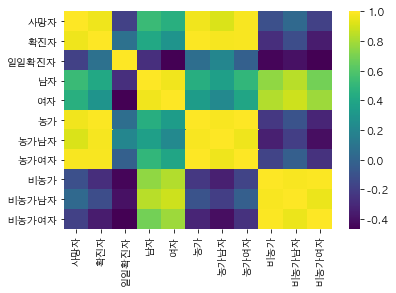

In [73]:
corr = daily_R_second.corr()
sns.heatmap(corr, cmap = 'viridis')
plt.show()

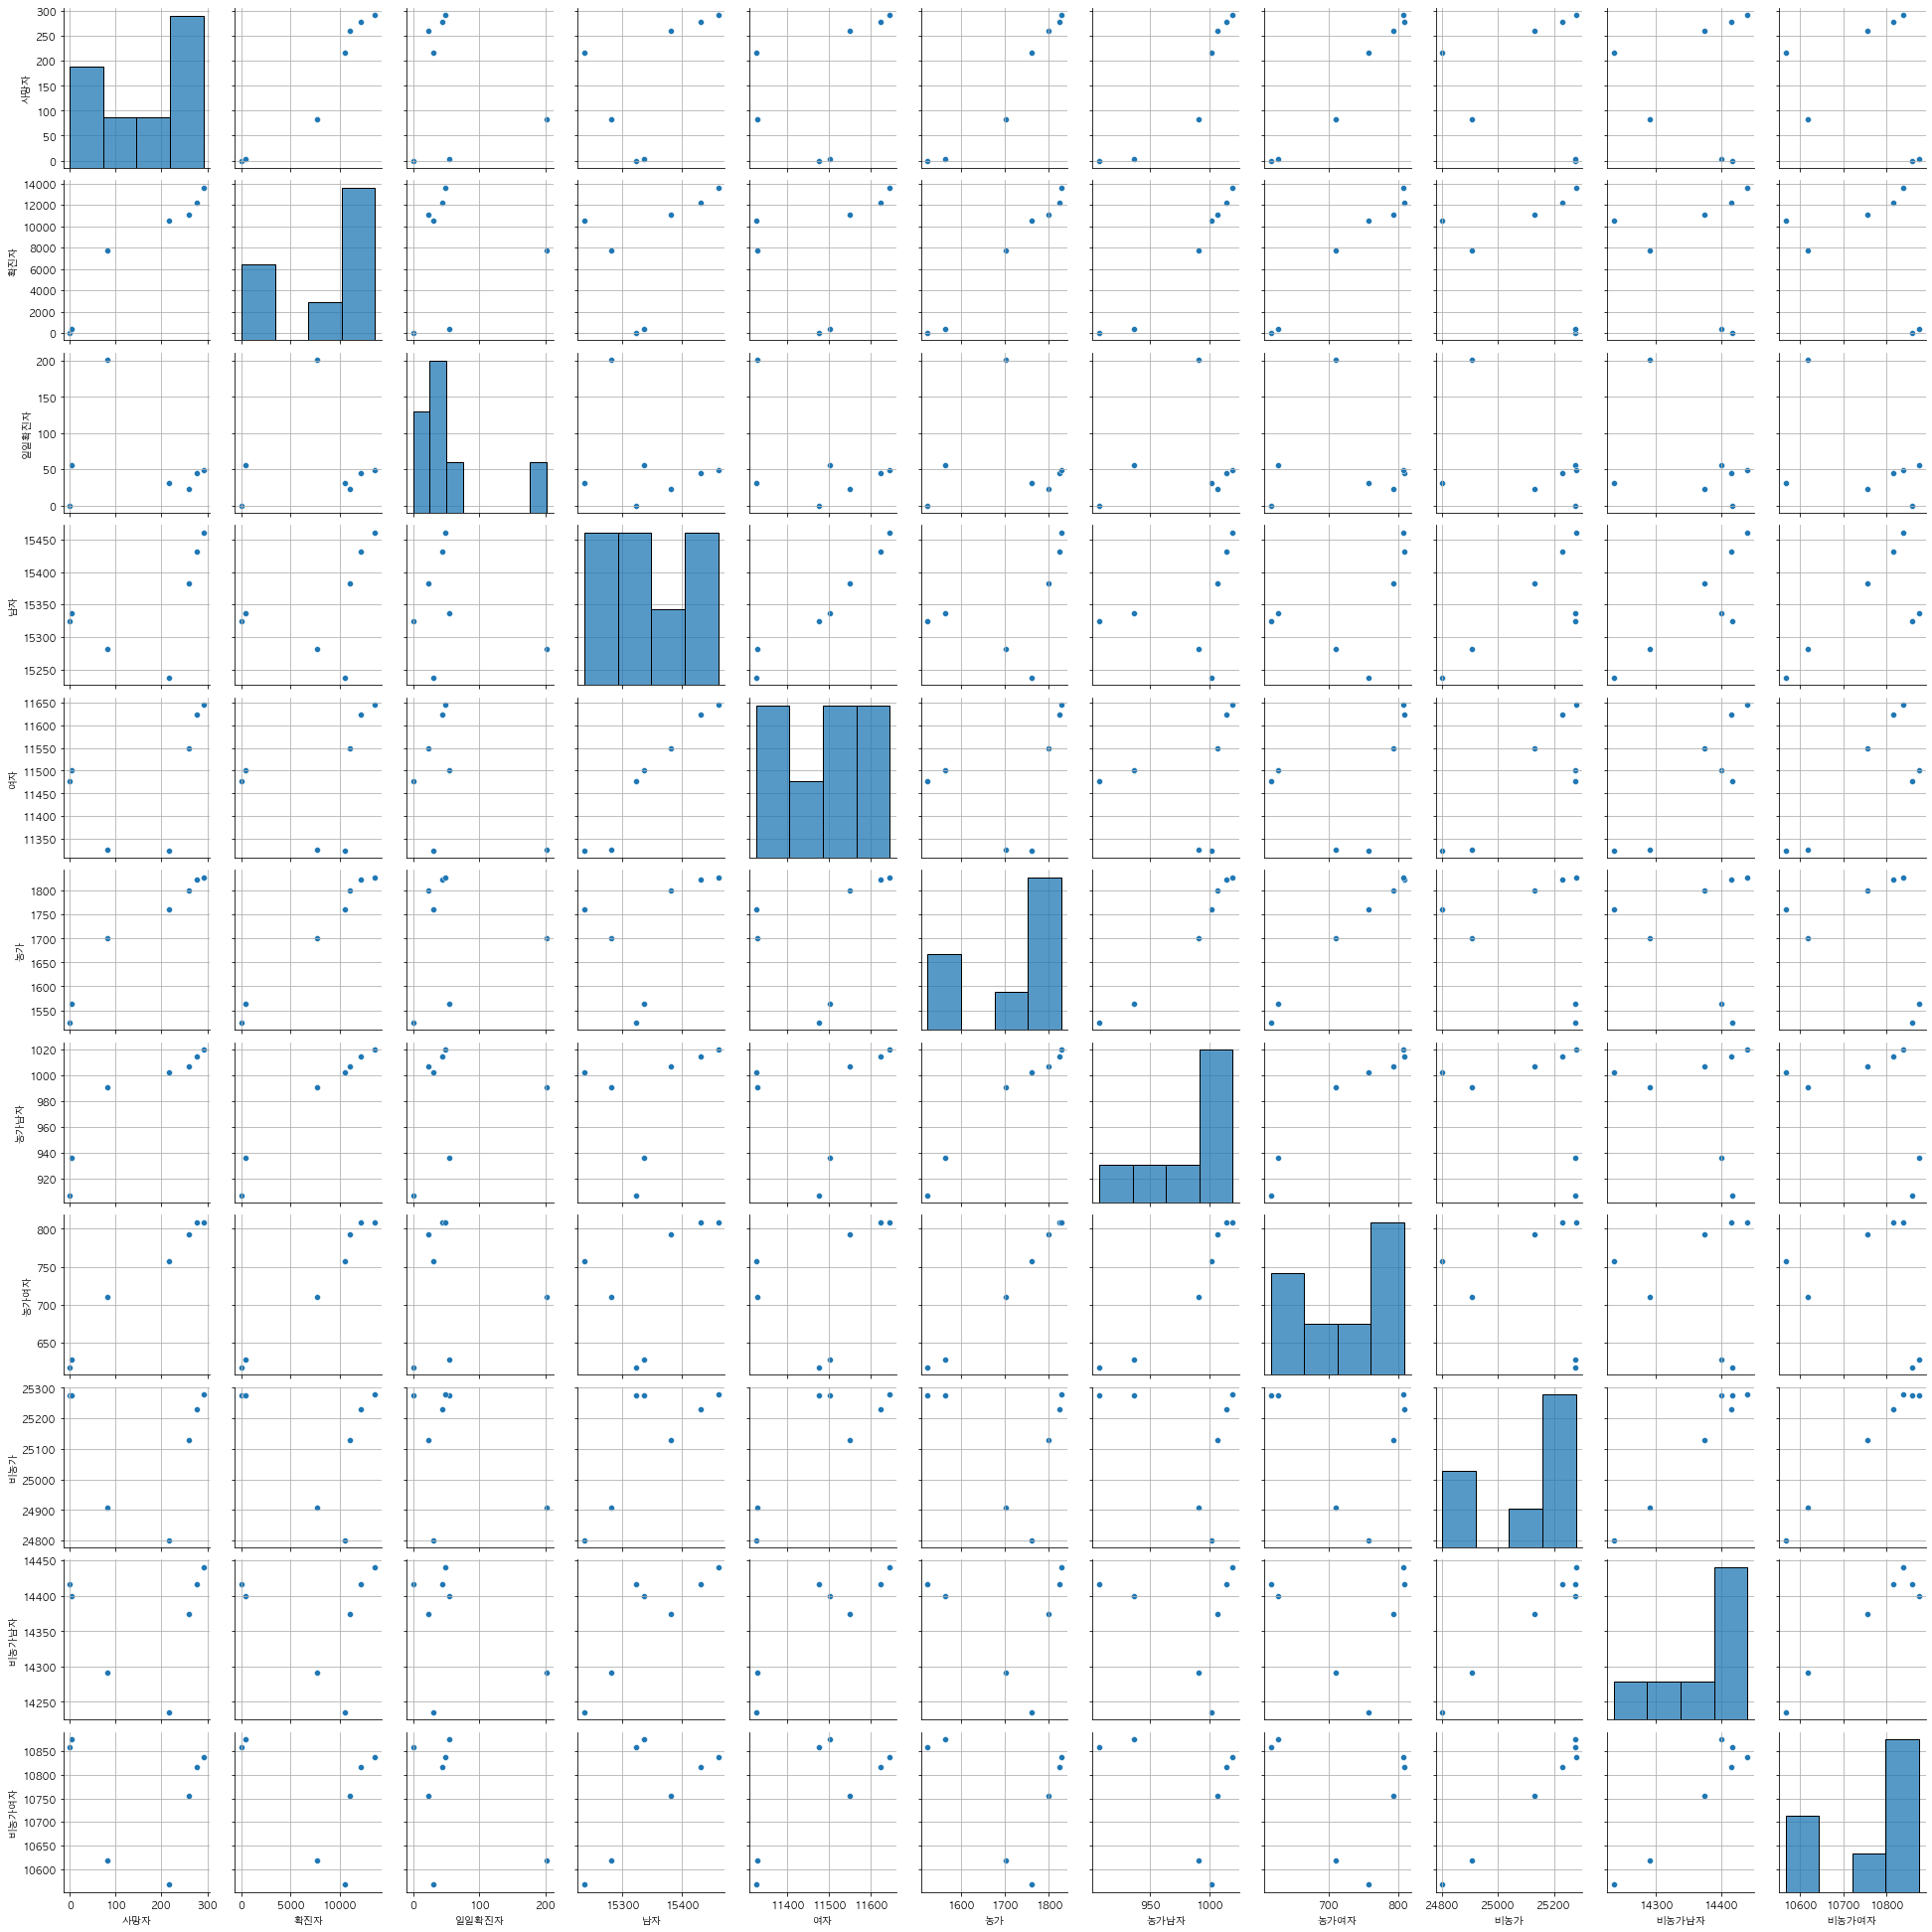

In [74]:
sns.pairplot(daily_R_second)
plt.show()

# 일일확진자 & 성별 취업자(천 명) 다중선형 회귀분석

In [75]:
daily_R_second.loc[:, ['남자', '여자']]

,남자,여자
2020-01-31,15324.0,11476.0
2020-02-29,15336.0,11502.0
2020-03-31,15282.0,11327.0
2020-04-30,15237.0,11325.0
2020-05-31,15382.0,11549.0
2020-06-30,15431.0,11624.0
2020-07-31,15461.0,11645.0


In [76]:
Y = daily_R_second.일일확진자
X = daily_R_second.loc[:, ['남자', '여자']]

In [82]:
daily_sex = sm.OLS(endog = Y,
                   exog = X).fit()
daily_sex.summary()

/Users/sejongpyo/python_project/sba/py37/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  일일확진자   R-squared (uncentered):                   0.663
Model:                            OLS   Adj. R-squared (uncentered):              0.529
Method:                 Least Squares   F-statistic:                              4.929
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                      0.0657
Time:                        20:46:13   Log-Likelihood:                         -37.131
No. Observations:                   7   AIC:                                      78.26
Df Residuals:                       5   BIC:                                      78.15
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
남자             0.4173      0.244      1.712      0.148      -0.209       1.044
여자            -0.5524      0.326     -1.697      0.151      -1.389       0.285
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.247
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.283
Skew:                           0.026   Prob(JB):                        0.868
Kurtosis:                       2.016   Cond. No.                         358.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
VIF = pd.DataFrame()
VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["Sex"] = X.columns

In [88]:
VIF

,VIF,Sex
0,29536.339446,남자
1,29536.339446,여자


In [94]:
X = daily_R_second.loc[:, ['농가', '농가남자', '농가여자']]

In [95]:
daily_sex = sm.OLS(endog = Y,
                   exog = X).fit()
daily_sex.summary()

/Users/sejongpyo/python_project/sba/py37/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  일일확진자   R-squared (uncentered):                   0.500
Model:                            OLS   Adj. R-squared (uncentered):              0.301
Method:                 Least Squares   F-statistic:                              2.504
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                       0.176
Time:                        21:37:07   Log-Likelihood:                         -38.514
No. Observations:                   7   AIC:                                      81.03
Df Residuals:                       5   BIC:                                      80.92
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
농가            -0.0020      0.047     -0.042      0.968      -0.124       0.120
농가남자           0.2525      0.458      0.551      0.605      -0.925       1.430
농가여자          -0.2545      0.504     -0.505      0.635      -1.551       1.042
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.124
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.940
Skew:                           1.473   Prob(JB):                        0.230
Kurtosis:                       4.183   Cond. No.                     3.47e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.59e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
VIF = pd.DataFrame()
VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["Countryside"] = X.columns

/Users/sejongpyo/python_project/sba/py37/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [93]:
VIF

,VIF,Countryside
0,inf,농가
1,inf,농가남자
2,inf,농가여자


In [97]:
X = daily_R_second.loc[:, ['비농가', '비농가남자', '비농가여자']]

In [98]:
daily_sex = sm.OLS(endog = Y,
                   exog = X).fit()
daily_sex.summary()

/Users/sejongpyo/python_project/sba/py37/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  일일확진자   R-squared (uncentered):                   0.600
Model:                            OLS   Adj. R-squared (uncentered):              0.300
Method:                 Least Squares   F-statistic:                              1.998
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                       0.257
Time:                        21:38:16   Log-Likelihood:                         -37.737
No. Observations:                   7   AIC:                                      81.47
Df Residuals:                       4   BIC:                                      81.31
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
비농가            2.5769     60.060      0.043      0.968    -164.178     169.332
비농가남자         -2.2230     60.123     -0.037      0.972    -169.150     164.704
비농가여자         -3.0441     59.978     -0.051      0.962    -169.571     163.483
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.101
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.575
Skew:                           0.671   Prob(JB):                        0.750
Kurtosis:                       2.586   Cond. No.                     1.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# 성별 실업자(천명)
S = month_1.iloc[:, 720:728]
S

,남자.1,여자.1,농가.1,농가남자.1,농가여자.1,비농가.1,비농가남자.1,비농가여자.1
monthly_index,,,,,,,,
2020-01-31,626.0,526.0,34.0,25.0,9.0,1119.0,601.0,518.0
2020-02-29,643.0,509.0,23.0,16.0,7.0,1130.0,627.0,503.0
2020-03-31,662.0,517.0,24.0,15.0,8.0,1156.0,647.0,509.0
2020-04-30,675.0,497.0,29.0,22.0,7.0,1143.0,653.0,490.0
2020-05-31,737.0,541.0,23.0,15.0,8.0,1255.0,722.0,533.0
2020-06-30,694.0,534.0,27.0,19.0,9.0,1201.0,675.0,525.0
2020-07-31,642.0,496.0,24.0,20.0,5.0,1114.0,622.0,491.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
month_daily

,사망자,확진자,일일확진자
기준일,,,
2020-01-31,0.000000,0.000000,0.000000
2020-02-29,2.771930,408.771930,55.263158
2020-03-31,82.636364,7740.787879,201.090909
2020-04-30,215.935484,10494.677419,31.258065
2020-05-31,260.677419,11039.677419,22.677419
2020-06-30,277.533333,12148.600000,44.400000
2020-07-31,291.548387,13610.806452,48.548387
2020-08-31,307.548387,16116.225806,182.000000
2020-09-30,342.466667,21412.600000,162.933333


In [102]:
hello1 = month_daily.drop(pd.to_datetime('2020-09-30'))
hello1

,사망자,확진자,일일확진자
기준일,,,
2020-01-31,0.000000,0.000000,0.000000
2020-02-29,2.771930,408.771930,55.263158
2020-03-31,82.636364,7740.787879,201.090909
2020-04-30,215.935484,10494.677419,31.258065
2020-05-31,260.677419,11039.677419,22.677419
2020-06-30,277.533333,12148.600000,44.400000
2020-07-31,291.548387,13610.806452,48.548387
2020-08-31,307.548387,16116.225806,182.000000


In [103]:
hello2 = hello1.drop(pd.to_datetime('2020-08-31'))
hello2

,사망자,확진자,일일확진자
기준일,,,
2020-01-31,0.000000,0.000000,0.000000
2020-02-29,2.771930,408.771930,55.263158
2020-03-31,82.636364,7740.787879,201.090909
2020-04-30,215.935484,10494.677419,31.258065
2020-05-31,260.677419,11039.677419,22.677419
2020-06-30,277.533333,12148.600000,44.400000
2020-07-31,291.548387,13610.806452,48.548387


# 성별 실업자(천명)

In [106]:
daily_S = pd.concat(objs = [hello2, S], axis = 1)
daily_S

,사망자,확진자,일일확진자,남자.1,여자.1,농가.1,농가남자.1,농가여자.1,비농가.1,비농가남자.1,비농가여자.1
2020-01-31,0.000000,0.000000,0.000000,626.0,526.0,34.0,25.0,9.0,1119.0,601.0,518.0
2020-02-29,2.771930,408.771930,55.263158,643.0,509.0,23.0,16.0,7.0,1130.0,627.0,503.0
2020-03-31,82.636364,7740.787879,201.090909,662.0,517.0,24.0,15.0,8.0,1156.0,647.0,509.0
2020-04-30,215.935484,10494.677419,31.258065,675.0,497.0,29.0,22.0,7.0,1143.0,653.0,490.0
2020-05-31,260.677419,11039.677419,22.677419,737.0,541.0,23.0,15.0,8.0,1255.0,722.0,533.0
2020-06-30,277.533333,12148.600000,44.400000,694.0,534.0,27.0,19.0,9.0,1201.0,675.0,525.0
2020-07-31,291.548387,13610.806452,48.548387,642.0,496.0,24.0,20.0,5.0,1114.0,622.0,491.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
daily_S = daily_S.drop(daily_S.index[7])

In [108]:
daily_S.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2020-01-31 to 2020-07-31
Freq: M
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   사망자      7 non-null      float64
 1   확진자      7 non-null      float64
 2   일일확진자    7 non-null      float64
 3   남자.1     7 non-null      float64
 4   여자.1     7 non-null      float64
 5   농가.1     7 non-null      float64
 6   농가남자.1   7 non-null      float64
 7   농가여자.1   7 non-null      float64
 8   비농가.1    7 non-null      float64
 9   비농가남자.1  7 non-null      float64
 10  비농가여자.1  7 non-null      float64
dtypes: float64(11)
memory usage: 672.0 bytes


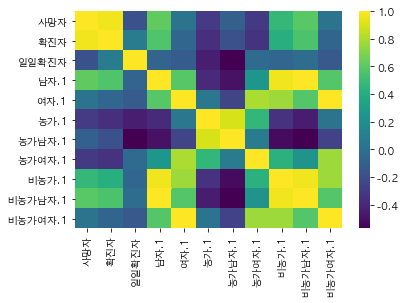

In [109]:
corr = daily_S.corr()
sns.heatmap(corr, cmap = 'viridis')
plt.show()

In [110]:
Y = daily_S.일일확진자
X = daily_S.loc[:, ['남자.1', '여자.1']]

In [111]:
daily_sex = sm.OLS(endog = Y,
                   exog = X).fit()
daily_sex.summary()

/Users/sejongpyo/python_project/sba/py37/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  일일확진자   R-squared (uncentered):                   0.467
Model:                            OLS   Adj. R-squared (uncentered):              0.254
Method:                 Least Squares   F-statistic:                              2.189
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                       0.208
Time:                        21:45:27   Log-Likelihood:                         -38.742
No. Observations:                   7   AIC:                                      81.48
Df Residuals:                       5   BIC:                                      81.38
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
남자.1           0.0026      0.963      0.003      0.998      -2.474       2.479
여자.1           0.1075      1.246      0.086      0.935      -3.096       3.311
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.021
Prob(Omnibus):                    nan   Jarque-Bera (JB):                3.843
Skew:                           1.666   Prob(JB):                        0.146
Kurtosis:                       4.438   Cond. No.                         48.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
Y = daily_S.확진자

In [113]:
daily_sex = sm.OLS(endog = Y,
                   exog = X).fit()
daily_sex.summary()

/Users/sejongpyo/python_project/sba/py37/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    확진자   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              16.01
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                     0.00671
Time:                        21:47:16   Log-Likelihood:                         -67.002
No. Observations:                   7   AIC:                                      138.0
Df Residuals:                       5   BIC:                                      137.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
남자.1         134.7627     54.588      2.469      0.057      -5.560     275.086
여자.1        -158.8998     70.619     -2.250      0.074    -340.432      22.633
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.213
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.270
Skew:                           0.253   Prob(JB):                        0.874
Kurtosis:                       2.182   Cond. No.                         48.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
VIF = pd.DataFrame()
VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["fired_sex"] = X.columns
VIF

,VIF,fired_sex
0,553.498198,남자.1
1,553.498198,여자.1


In [205]:
# 성별 실업률
T = month_1.iloc[:, 728:736]
T

,남자.2,여자.2,농가.2,농가남자.2,농가여자.2,비농가.2,비농가남자.2,비농가여자.2
monthly_index,,,,,,,,
2020-01-31,3.9,4.4,2.2,2.7,1.4,4.2,4.0,4.6
2020-02-29,4.0,4.2,1.5,1.7,1.1,4.3,4.2,4.4
2020-03-31,4.2,4.4,1.4,1.5,1.2,4.4,4.3,4.6
2020-04-30,4.2,4.2,1.6,2.1,0.9,4.4,4.4,4.4
2020-05-31,4.6,4.5,1.3,1.5,1.0,4.8,4.8,4.7
2020-06-30,4.3,4.4,1.5,1.8,1.1,4.5,4.5,4.6
2020-07-31,4.0,4.1,1.3,1.9,0.6,4.2,4.1,4.3
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
# 성별 고용률
U = month_1.iloc[:, 736:744]
U

,남자.3,여자.3,농가.3,농가남자.3,농가여자.3,비농가.3,비농가남자.3,비농가여자.3
monthly_index,,,,,,,,
2020-01-31,69.7,50.6,66.7,76.2,56.4,59.6,69.4,50.3
2020-02-29,69.7,50.7,68.3,78.4,57.3,59.6,69.2,50.3
2020-03-31,69.5,49.9,74.5,83.1,65.0,58.7,68.7,49.1
2020-04-30,69.3,49.8,77.5,84.7,69.6,58.4,68.4,48.8
2020-05-31,69.9,50.8,79.0,85.0,72.6,59.2,69.0,49.7
2020-06-30,70.1,51.1,78.9,84.6,72.7,59.4,69.2,50.0
2020-07-31,70.2,51.2,78.8,85.1,72.1,59.5,69.3,50.1
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
# 연령별 취업자(천명)
V = month_1.iloc[:, 744:754]
V

,15세 이상 전체,15 - 19세,20 - 29세,30 - 39세,40 - 49세,50 - 59세,60세이상,15 - 64세,15 - 24세,15 - 29세
monthly_index,,,,,,,,,,
2020-01-31,26800.0,205.0,3751.0,5518.0,6455.0,6373.0,4497.0,24487.0,1460.0,3956.0
2020-02-29,26838.0,194.0,3663.0,5501.0,6426.0,6358.0,4696.0,24339.0,1410.0,3857.0
2020-03-31,26609.0,150.0,3520.0,5407.0,6376.0,6308.0,4848.0,23982.0,1269.0,3671.0
2020-04-30,26562.0,129.0,3524.0,5362.0,6312.0,6296.0,4939.0,23875.0,1252.0,3653.0
2020-05-31,26930.0,168.0,3602.0,5360.0,6333.0,6347.0,5121.0,24113.0,1360.0,3770.0
2020-06-30,27055.0,172.0,3578.0,5380.0,6333.0,6372.0,5221.0,24166.0,1368.0,3750.0
2020-07-31,27106.0,179.0,3622.0,5371.0,6328.0,6355.0,5251.0,24191.0,1400.0,3802.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
# 연령별 실업자(천명)
X = month_1.iloc[:, 754:764]
X

,15세 이상 전체.1,15 - 19세.1,20 - 29세.1,30 - 39세.1,40 - 49세.1,50 - 59세.1,60세이상.1,15 - 64세.1,15 - 24세.1,15 - 29세.1
monthly_index,,,,,,,,,,
2020-01-31,1153.0,24.0,304.0,163.0,132.0,187.0,342.0,898.0,152.0,329.0
2020-02-29,1153.0,19.0,362.0,187.0,158.0,191.0,235.0,1008.0,179.0,381.0
2020-03-31,1180.0,23.0,379.0,184.0,175.0,211.0,208.0,1062.0,179.0,402.0
2020-04-30,1172.0,19.0,355.0,196.0,182.0,233.0,189.0,1065.0,177.0,373.0
2020-05-31,1278.0,14.0,413.0,219.0,191.0,245.0,198.0,1178.0,183.0,426.0
2020-06-30,1228.0,10.0,441.0,208.0,183.0,217.0,170.0,1148.0,179.0,451.0
2020-07-31,1138.0,19.0,387.0,190.0,178.0,210.0,153.0,1062.0,166.0,406.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
# 연령별 실업률
Y = month_1.iloc[:, 764:774]
Y

,15세 이상 전체.2,15 - 19세.2,20 - 29세.2,30 - 39세.2,40 - 49세.2,50 - 59세.2,60세이상.2,15 - 64세.2,15 - 24세.2,15 - 29세.2
monthly_index,,,,,,,,,,
2020-01-31,4.1,10.6,7.5,2.9,2.0,2.8,7.1,3.5,9.5,7.7
2020-02-29,4.1,8.9,9.0,3.3,2.4,2.9,4.8,4.0,11.3,9.0
2020-03-31,4.2,13.5,9.7,3.3,2.7,3.2,4.1,4.2,12.4,9.9
2020-04-30,4.2,12.7,9.1,3.5,2.8,3.6,3.7,4.3,12.4,9.3
2020-05-31,4.5,7.5,10.3,3.9,2.9,3.7,3.7,4.7,11.8,10.2
2020-06-30,4.3,5.3,11.0,3.7,2.8,3.3,3.1,4.5,11.6,10.7
2020-07-31,4.0,9.7,9.7,3.4,2.7,3.2,2.8,4.2,10.6,9.7
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
# 연령별 고용률
Z = month_1.iloc[:, 774:784]
Z

,15세 이상 전체.3,15 - 19세.3,20 - 29세.3,30 - 39세.3,40 - 49세.3,50 - 59세.3,60세이상.3,15 - 64세.3,15 - 24세.3,15 - 29세.3
monthly_index,,,,,,,,,,
2020-01-31,60.0,8.1,58.1,76.7,78.1,74.5,38.6,66.7,26.9,44.0
2020-02-29,60.0,7.7,56.6,76.5,77.8,74.3,40.1,66.3,26.0,42.9
2020-03-31,59.5,6.0,54.5,75.4,77.3,73.7,41.2,65.4,23.5,41.0
2020-04-30,59.4,5.2,54.6,74.9,76.5,73.6,41.8,65.1,23.3,40.9
2020-05-31,60.2,6.8,55.7,75.0,76.8,74.2,43.1,65.8,25.4,42.2
2020-06-30,60.4,7.0,55.4,75.4,76.9,74.5,43.8,65.9,25.6,42.0
2020-07-31,60.5,7.3,56.1,75.4,76.9,74.3,43.8,66.0,26.3,42.7
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 상관관계 분석